In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# This part is because i have saved the dataset in my google drive.

import pandas as pd


file_path = '/content/drive/MyDrive/Colab Notebooks/logged_data.csv'

#  This code is to Load the CSV into colab
df = pd.read_csv(file_path)

# This code is to Preview the data
df.head()


,Timestamp,Frequency,Signal Strength,Modulation,Bandwidth,Location,Device Type,Antenna Type,Temperature,Humidity,...,Memory Usage,WiFi Strength,Disk Usage,System Load,Latitude,Longitude,Altitude(m),Air Pressure,Device Status,I/Q Data
0,2023-05-05 00:00:00,120000000,-44,QAM,50000,"Patna, Bihar",HackRF,Yagi,24,47,...,28.3,-77,18.5,4.300781,25.612677,85.158875,59.46,NaN,Streaming I/Q data,"[(-0.7204492334669581-0.13150053996590505j), (..."
1,2023-05-05 00:00:20,160000000,-97,FM,1000000,"Patna, Bihar",HackRF,Yagi,27,39,...,28.3,-57,18.5,4.300781,25.612677,85.158875,59.46,NaN,Streaming I/Q data,"[(-0.9514742558373084-0.2713158600194827j), (-..."
2,2023-05-05 00:00:40,90000000,-87,BPSK,500000,"Patna, Bihar",Halow-U,Yagi,40,58,...,28.3,-20,18.5,4.300781,25.612677,85.158875,59.46,NaN,Transmitting beacon signal,"[(0.2227144792597957+0.958588241755097j), (0.2..."
3,2023-05-05 00:01:00,160000000,-29,FM,100000,"Patna, Bihar",Halow-U,Dipole,28,50,...,28.3,-38,18.5,4.300781,25.612677,85.158875,59.46,NaN,Transmitting beacon signal,"[(-0.3238055039162817+0.855187296295747j), (-0..."
4,2023-05-05 00:01:20,70000000,-26,8PSK,10000,"Patna, Bihar",HackRF,Omnidirectional,22,78,...,28.3,-43,18.5,4.300781,25.612677,85.158875,59.46,NaN,Streaming I/Q data,"[(-0.30500282741187124-0.26473341302686326j), ..."


In [4]:
# Encode categorical features
df["Modulation"] = df["Modulation"].astype("category").cat.codes
df["Device Status"] = df["Device Status"].astype("category").cat.codes

# Convert timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Hour"] = df["Timestamp"].dt.hour

# Select features
features = ["Frequency", "Signal Strength", "Modulation", "Hour", "Temperature", "Humidity", "Wind Speed"]
X = df[features]
y = df["Device Status"]  # Target variable: Encoded "Streaming", "Transmitting", etc.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.3364400584795322
              precision    recall  f1-score   support

           0       0.34      0.35      0.35     11008
           1       0.34      0.34      0.34     10932
           2       0.33      0.31      0.32     10892

    accuracy                           0.34     32832
   macro avg       0.34      0.34      0.34     32832
weighted avg       0.34      0.34      0.34     32832



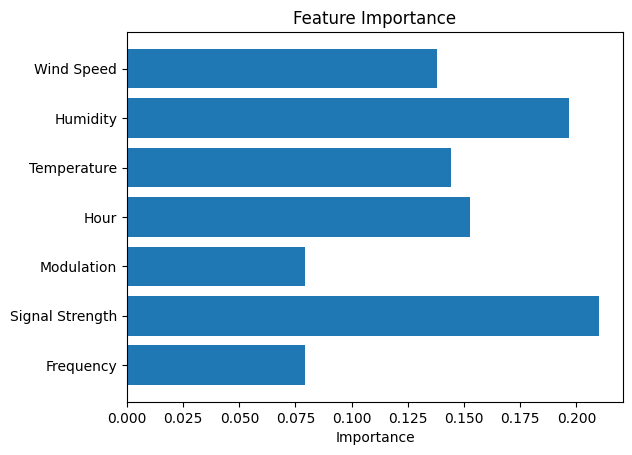

In [7]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(features, importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()


In [8]:
import joblib

# Save model and scaler
joblib.dump(model, "rf_signal_classifier.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [12]:
# The prediction starts here !!!!
y_pred = model.predict(X_test)


In [13]:
label_encoder = df["Device Status"].astype("category").cat.categories


In [16]:
  import joblib
import numpy as np

# Load your trained model and scaler
model = joblib.load("rf_signal_classifier.pkl")
scaler = joblib.load("scaler.pkl")

# Restore the category labels (based on training)
label_encoder = df["Device Status"].astype("category").cat.categories

# Ask user for inputs
print("Enter the following values for prediction:")

freq = float(input("Frequency (Hz): "))
strength = float(input("Signal Strength (dBm): "))
modulation = int(input("Modulation (encoded as number, e.g., QAM=0, FM=1, etc.): "))
hour = int(input("Hour of day (0-23): "))
temp = float(input("Temperature (°C): "))
humidity = float(input("Humidity (%): "))
wind = float(input("Wind Speed (km/h): "))

import pandas as pd

# Create DataFrame with feature names
new_input = pd.DataFrame([{
    "Frequency": freq,
    "Signal Strength": strength,
    "Modulation": modulation,
    "Hour": hour,
    "Temperature": temp,
    "Humidity": humidity,
    "Wind Speed": wind
}])

# Scale the input
new_scaled = scaler.transform(new_input)
2


# Predict
prediction = model.predict(new_scaled)
predicted_label = label_encoder[prediction[0]]

# Output result
print("\nPredicted Device Status:", predicted_label)


Enter the following values for prediction:
Frequency (Hz): 23
Signal Strength (dBm): 23
Modulation (encoded as number, e.g., QAM=0, FM=1, etc.): 1
Hour of day (0-23): 234
Temperature (°C): 11
Humidity (%): 22
Wind Speed (km/h): 2

Predicted Device Status: 1


In [17]:
predicted_label = label_encoder[prediction[0]]
print("\nPredicted Device Status:", predicted_label)



Predicted Device Status: 1
